# Exercise 4.10: Final Report

Contents

#1 Importing Libraries and Data

#2 Security implications and PII data

#3 Comparing customer behavior in different geographic areas.

#4 Exclude low-activity customers

#5 Customer profiles

#6 Visualizing profile distributions

#7 Descriptive statistics on customer profiles for usage frequency and expenditure.

#8 Customer profiles with regions and departments.

#9 Visualizing profile differences in department preferences

#10 Price_range Visualization and Investigative Crosstabs


#01 Importing Libraries and Data

In [2]:
# Importing Libraries and Python Data frames

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Define the paths
path = r'C:\Users\Jimadek\Coding Etiquette and Excel Reporting 4.10' 
Viz_path = r'C:\Users\Jimadek\Data Visualization with Python 4.9'
paths = r'C:\Users\Jimadek\21'

In [4]:
# Import customer_merged pkl file
df_customer_merged = pd.read_pickle(os.path.join(path,'02 Data','Original Data','customer_merged.pkl'))

In [5]:
#Add departments column to dataframe
#import departments_wrangled.csv as df_dep

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'department_wrangled.csv'), index_col = False)

In [6]:
df_customer_merged.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,membership_date,total_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df_customer_merged.shape

(30629741, 33)

In [8]:
#check for null values
df_customer_merged.isnull().sum()

order_id                         0
user_id                          0
order_number                     0
order_dow                        0
order_hour_of_day                0
days_since_prior_order     1962703
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
_merge                           0
price_range_loc           19949247
busiest_day                      0
Busiest_days                     0
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
avg_price                        0
spending_flag                    0
median_dspo                      0
order_frequency_flag             0
first_name                       0
last_name                        0
gender                           0
state                            0
age                 

#02 Security implications and PII data

In [9]:
# The customer first_name and last_name in this data are personally identifiable information (PII).
# However, they will be dropped because they are of no significant importance in this analysis.
## Drop the first_name and last_name columnsof the dataframe.

df_secure = df_customer_merged.drop(columns = ['first_name','last_name'])

In [10]:
# The customer dataframe without Personally Identifiable Informationn(PII).
df_secure.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_dspo,order_frequency_flag,gender,state,age,membership_date,total_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,high spender,10,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,high spender,10,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,high spender,10,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,high spender,10,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,high spender,10,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#03 Comparing customer behavior in different geographic areas.

In [11]:
# Regional segmantation

# Divide States into regions according to 'List of regions of the United States' wikipedia entry

northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Use the loc function to determine the region for each row in df. 

df_secure.loc[df_secure['state'].isin(northeast), 'region'] = 'Northeast'
df_secure.loc[df_secure['state'].isin(midwest), 'region'] = 'Midwest'
df_secure.loc[df_secure['state'].isin(south), 'region'] = 'South'
df_secure.loc[df_secure['state'].isin(west), 'region'] = 'West'

In [13]:
# Check the 'region' column for results
df_secure['region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: region, dtype: int64

In [18]:
# Difference in spending habits between the different U.S. regions.
## Create a crosstab between region and spending_flag columns

crosstab_region_spending = pd.crosstab(df_secure['region'], df_secure['spending_flag'], dropna = False)

In [19]:
crosstab_region_spending

spending_flag,Low spender,high spender
region,,
Midwest,1214493,5962431
Northeast,915213,4506812
South,1717533,8481449
West,1326534,6505276


#Spending analysis facts

High spenders in the south bought the most while high spenders in the Northeast bought the least. The same applies to the low spender.

#04 Excluding low-activity customers from data.

In [20]:
# Create an exclusion flag for low-activity customers (customers with < 5 orders) and exclude them from the data.
## The 'max_order' column contains the max total orders for that user
df_reg_cust = df_secure[df_secure['max_order'] >= 5]

In [21]:
df_reg_cust.shape

(29270938, 32)

#05 Customer profiling

In [22]:
#Age profile
#Check the descriptive statistics for age variable
df_reg_cust['age'].describe()

count    2.927094e+07
mean     4.947596e+01
std      1.847853e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

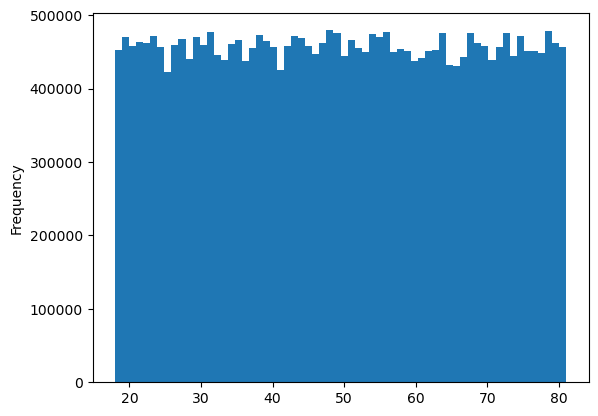

In [23]:
#Create a histogram of customer age
df_reg_cust['age'].plot.hist(bins = 64)

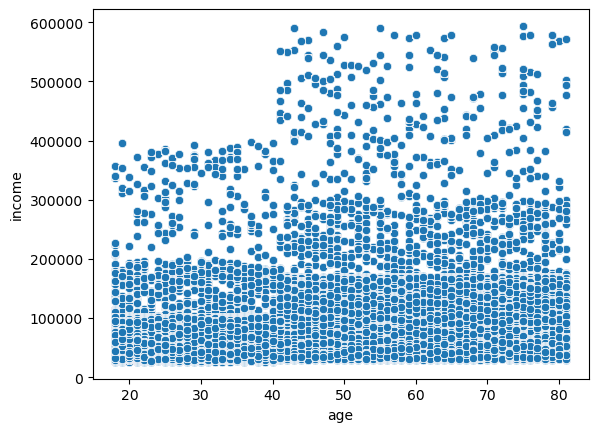

In [24]:
# Scatterplot of income range by age 
scatter_income = sns.scatterplot (data = df_reg_cust, x= 'age', y= 'income')

#According to the histogram, age distribution across the customer base is relatively uniform and varies approximately 460,000 to 490,000 customers between ages 18 and 81. 

#The scatterplot indicates an increase in income at about age 40 and this extended beyond 65years.

Customers will be classified as follows:
-Young Adult: < 40 
-Middle-Aged: 40-65 
-Senior: >= 65

In [25]:
# Create age_group classification - using df to add new columns.

df_reg_cust.loc[(df_reg_cust['age'] < 40), 'age_group'] = 'Young Adult'
df_reg_cust.loc[(df_reg_cust['age'] >= 40) & (df_reg_cust['age'] < 65), 'age_group'] = 'Middle-Aged'
df_reg_cust.loc[df_reg_cust['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\Jimadek\AppData\Local\Temp\ipykernel_17060\4069961799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['age'] < 40), 'age_group'] = 'Young Adult'


In [26]:
# Confirm the new column

df_reg_cust.shape

(29270938, 33)

In [27]:
#Checking entries of age_group column - by amount of products ordered

df_reg_cust['age_group'].value_counts(dropna = False).sort_index()

Middle-Aged    11456185
Senior          7739348
Young Adult    10075405
Name: age_group, dtype: int64

In [28]:
#Income profile
#Check the descriptive statistics for income variable

df_reg_cust['income'].describe()

count    2.927094e+07
mean     9.969692e+04
std      4.314845e+04
min      2.590300e+04
25%      6.736700e+04
50%      9.676300e+04
75%      1.281390e+05
max      5.939010e+05
Name: income, dtype: float64

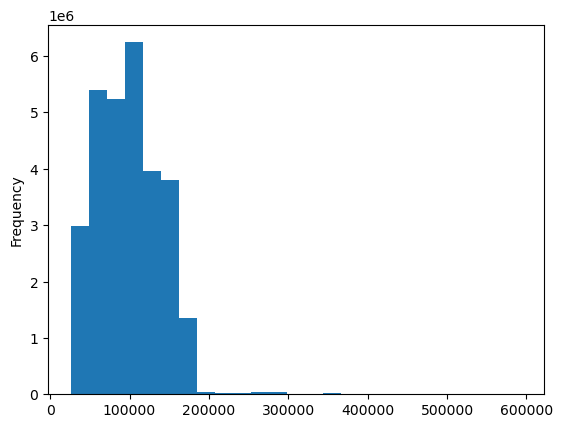

In [29]:
#Create a histogram of customer income
hist_cust_income = df_reg_cust['income'].plot.hist(bins = 25)

In [30]:
#Income distribution across the customer base ranges from 25k USD to 593K USD with an average income of 99k USD. 
#The majority of the customer base falls within the 25k to 180k USD range.

#Customers will be classified as follows <75k: 025-75k, >75k: 75k - 125k, 125k+: 125k - 593k

In [31]:
# Create income_group classification

df_reg_cust.loc[(df_reg_cust['income'] < 75000), 'income_group'] = '025-75k'
df_reg_cust.loc[(df_reg_cust['income'] >= 75000) & (df_reg_cust['income'] < 125000), 'income_group'] = '075-125k'
df_reg_cust.loc[(df_reg_cust['income'] >= 125000), 'income_group'] = '125k+'

C:\Users\Jimadek\AppData\Local\Temp\ipykernel_17060\4213800789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['income'] < 75000), 'income_group'] = '025-75k'


In [32]:
# Check the 'income_group' counts by number of items ordered
df_reg_cust['income_group'].value_counts(dropna = False)

075-125k    12085381
025-75k      9354836
125k+        7830721
Name: income_group, dtype: int64

In [33]:
df_reg_cust.shape

(29270938, 34)

In [34]:
# Family/dependants profile
df_reg_cust['total_dependants'].describe()

count    2.927094e+07
mean     1.501600e+00
std      1.118496e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: total_dependants, dtype: float64

<Axes: ylabel='Frequency'>

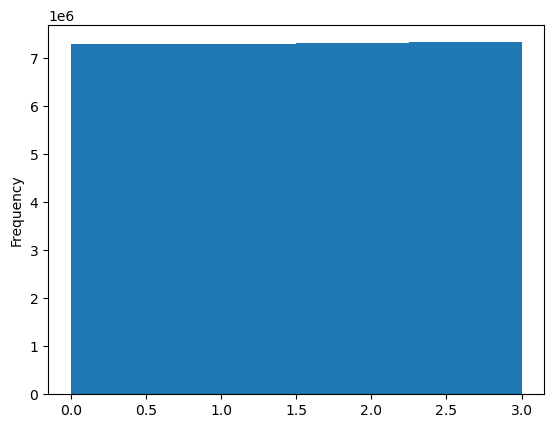

In [35]:
#Create a histogram of customer dependants
df_reg_cust['total_dependants'].plot.hist(bins = 4)

In [36]:
#Create a crosstab between number_dependants and family_status
family_crosstab = pd.crosstab(df_reg_cust['marital_status'], df_reg_cust['total_dependants'], dropna = False)

In [37]:
family_crosstab

total_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2510623,0,0,0
living with parents and siblings,0,487250,457728,460162
married,0,6814428,6860917,6877933
single,4801897,0,0,0


#According to the family_crosstab, all single adults or divorced/widowed adults have no dependants.

#'family_status' will be classified based on number of dependants.

#Customers will be classified as follows:
-No dependants: 0 dependants 
-Has dependants: 1+ dependants

In [38]:
# Create family_status classification
df_reg_cust.loc[(df_reg_cust['total_dependants'] == 0), 'dependants'] = 'No dependants'
df_reg_cust.loc[(df_reg_cust['total_dependants'] >= 1), 'dependants'] = 'Has dependants'

C:\Users\Jimadek\AppData\Local\Temp\ipykernel_17060\2860743663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['total_dependants'] == 0), 'dependants'] = 'No dependants'


In [39]:
# Check the 'dependants' counts by the number of items ordered
df_reg_cust['dependants'].value_counts(dropna = False)

Has dependants    21958418
No dependants      7312520
Name: dependants, dtype: int64

In [40]:
df_reg_cust.shape

(29270938, 35)

In [42]:
# Diet choice
diet_crosstab = pd.crosstab(df_reg_cust['department_id'], df_reg_cust['user_id'], dropna = False)

In [43]:
# Assigning diet flags to users and storing it in a dictionary
diet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-consumer'

In [44]:
# assigning user flags to the list
diet_list = []
for user in df_reg_cust['user_id']:
    diet_list.append(diet_dict[user])

In [48]:
#Adding 'diet_choice' column to df_reg_cust
df_reg_cust['diet_choice'] = diet_list

C:\Users\Jimadek\AppData\Local\Temp\ipykernel_17060\1374932723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust['diet_choice'] = diet_list


In [49]:
df_reg_cust.shape

(29270938, 37)

In [50]:
df_reg_cust['diet_choice'].value_counts(dropna = False)

Meat-consumer    21810526
Vegetarian        7167983
Vegan              292429
Name: diet_choice, dtype: int64

In [52]:
#Export df_reg_cust in .pkl format
df_reg_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'reg_customers.pkl'))

#06 visualization and distribution of profiles

In [55]:
# create profile dataframe
df_profile = df_reg_cust[['user_id', 
                          'age',
                          'age_group', 
                          'income_group', 
                          'dependants',
                          'diet_choice', 
                          'region', 
                          'loyalty_flag', 
                          'spending_flag', 
                          'order_frequency_flag', 
                          'reordered' ,
                          'marital_status']]

In [57]:
# create dataframe with unique user_ids
df_customers = df_profile.drop_duplicates(subset = ["user_id"])

In [58]:
df_customers.shape

(153805, 12)

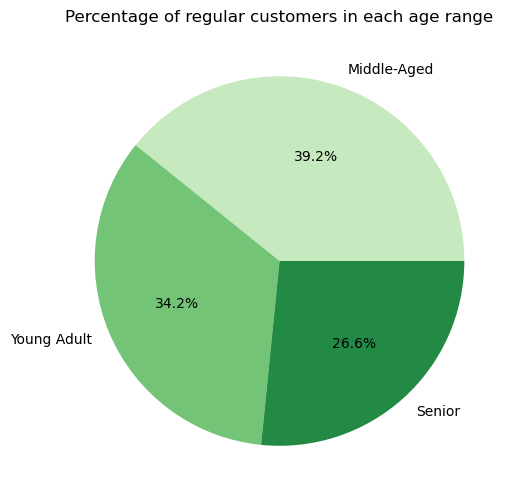

In [68]:
# Age profile Visualization
pie_user_age = df_customers['age_group'].value_counts().plot.pie(figsize = (6,6), 
                                                                colors = sns.color_palette('Greens', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers in each age range',fontsize=12)
plt.show()

In [63]:
# Export the user_age pie chart
pie_user_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_age.png'))

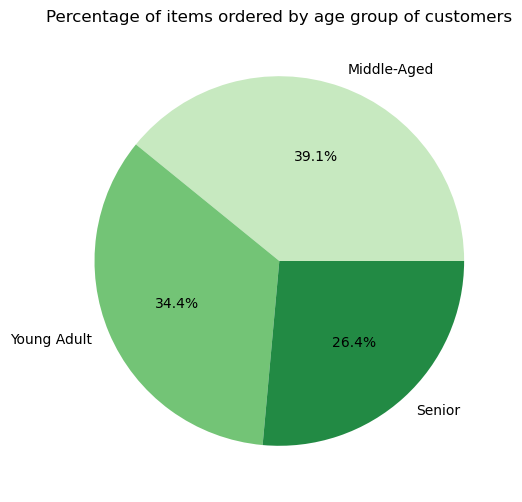

In [69]:
#Pie chart of percentage of items ordered by age group
pie_orders_age = df_reg_cust['age_group'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = sns.color_palette('Greens', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by age group of customers',fontsize=12)
plt.show()

In [67]:
# Export the orders_age pie chart
pie_orders_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_age.png'))

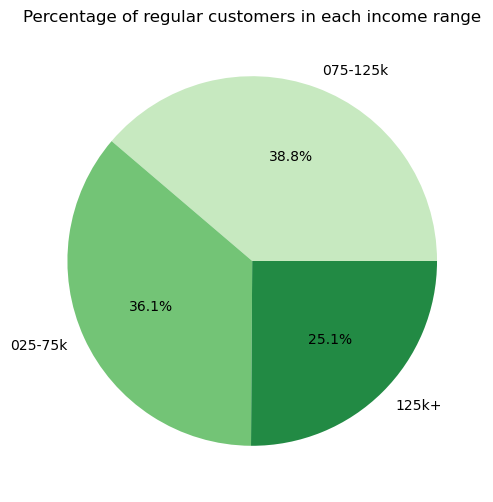

In [71]:
# Pie chart of customer income ranges
pie_user_income = df_customer['income_group'].value_counts().plot.pie(figsize = (6,6), 
                                                                      colors = sns.color_palette('Greens', 3), 
                                                                      autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers in each income range',fontsize=12)
plt.show()

In [72]:
# Export the user_income pie chart
pie_user_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_income.png'))

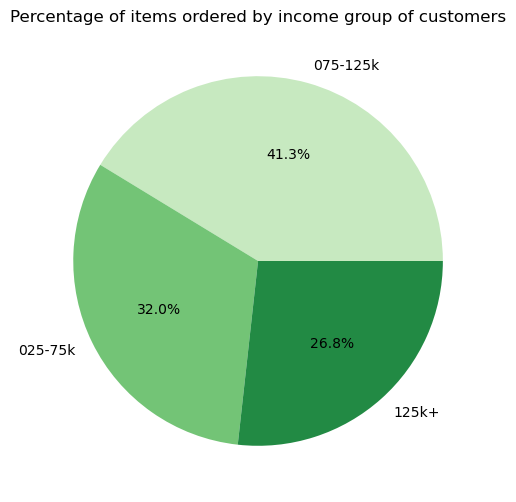

In [73]:
# Pie chart of percentage of items ordered by income group
pie_orders_income = df_reg_cust['income_group'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = sns.color_palette('Greens', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by income group of customers',fontsize=12)
plt.show()

In [75]:
# Export the user_income pie chart
pie_orders_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_income.png'))

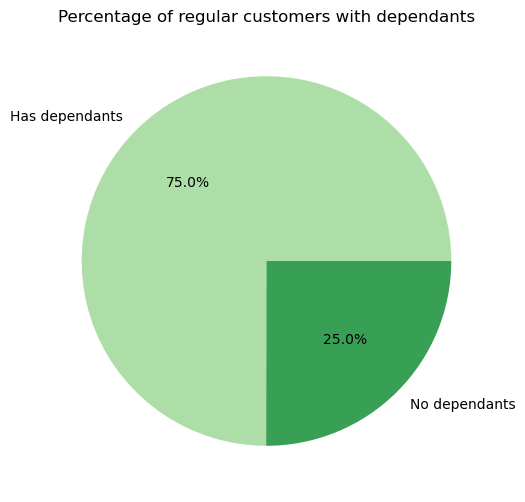

In [76]:
# Pie chart of customers with dependants
pie_user_dependants = df_customer['dependants'].value_counts().plot.pie(figsize = (6,6), 
                                                                        colors = sns.color_palette('Greens', 2), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers with dependants',fontsize=12)
plt.show()

In [78]:
# Export the user_dependants pie chart
pie_user_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_dependants.png'))

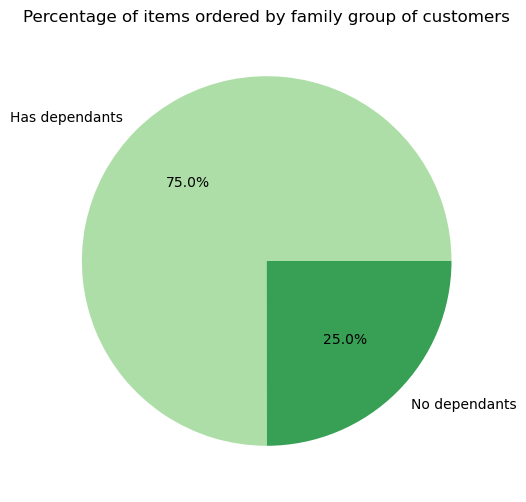

In [80]:
#Pie chart of percentage of items ordered by family group by dependants
pie_orders_family = df_reg_cust['dependants'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = sns.color_palette('Greens', 2), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by family group of customers',fontsize=12)
plt.show()

In [81]:
# Export the family_order pie chart
pie_orders_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_family.png'))

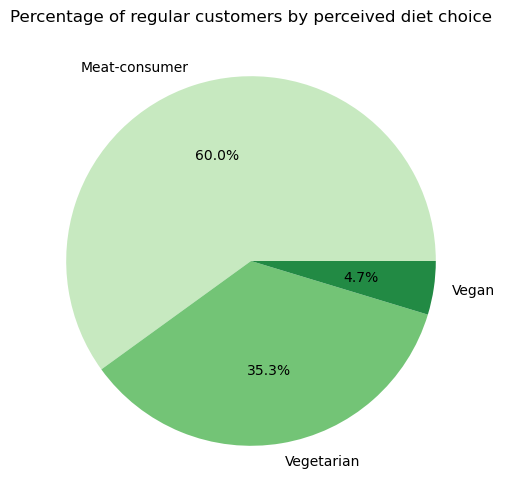

In [86]:
# Pie chart of customers diet choice by purchase history
pie_user_diet = df_customer['diet_choice'].value_counts().plot.pie(figsize = (6,6), 
                                                                        colors = sns.color_palette('Greens', 3), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by perceived diet choice',fontsize=12)
plt.show()

In [88]:
# Export the user_diet_choice pie chart
pie_user_diet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_diet.png'))

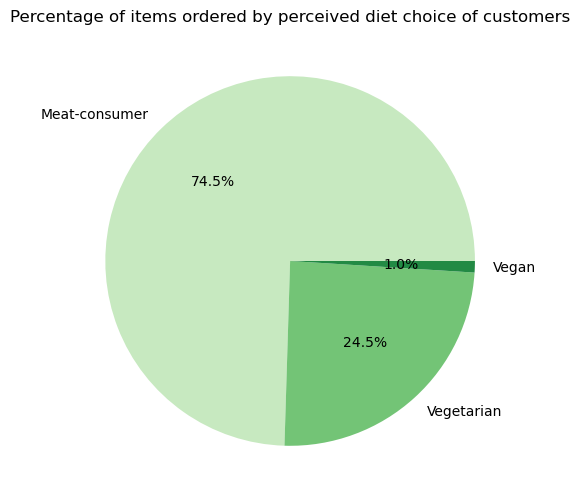

In [87]:
# Pie chart of percentage of items ordered by diet choice
pie_orders_diet = df_reg_cust['diet_style'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = sns.color_palette('Greens', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by perceived diet choice of customers',fontsize=12)
plt.show()

In [89]:
# Export the user_diet_choice pie chart
pie_orders_diet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_diet.png'))

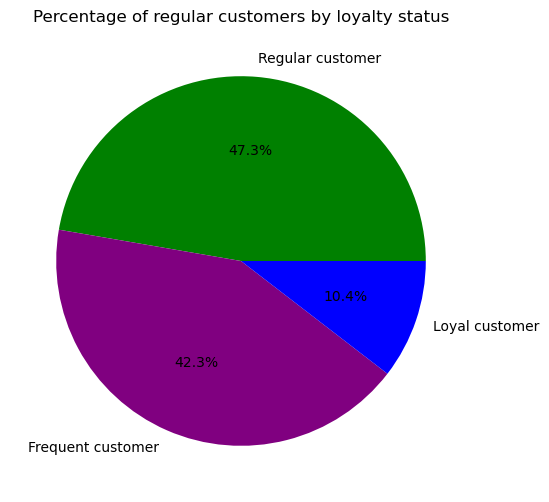

In [91]:
# Pie chart of customers by loyalty_flag
pie_user_loyalty = df_customer['loyalty_flag'].value_counts().plot.pie(figsize = (6,6), 
                                                              colors = ('Green', 'Purple', 'Blue'), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by loyalty status',fontsize=12)
plt.show()

In [92]:
# Export the user_loyalty pie chart
pie_user_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_loyalty.png'))

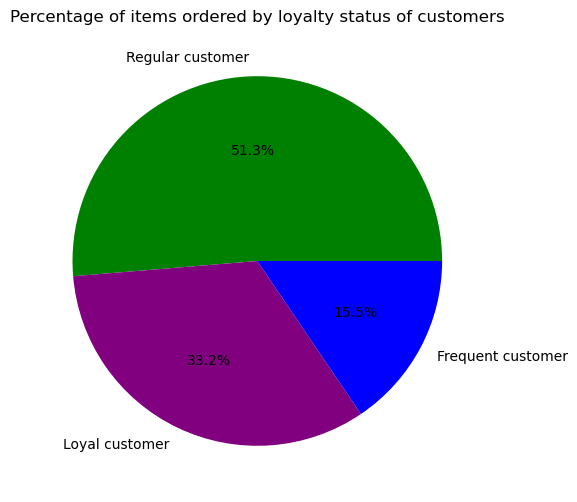

In [93]:
# Pie chart of percentage of items ordered by loyalty_flag 
pie_orders_loyalty = df_reg_cust['loyalty_flag'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = ('Green', 'Purple', 'Blue'), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by loyalty status of customers',fontsize=12)
plt.show()

In [94]:
# Export the orders_loyalty pie chart
pie_orders_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_loyalty.png'))

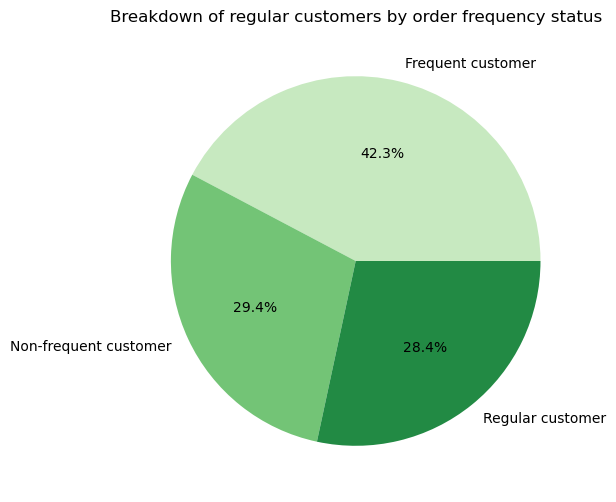

In [98]:
# Pie chart of customers by order_frequency
pie_user_freq = df_customer['order_frequency_flag'].value_counts().plot.pie(figsize = (6,6), 
                                                              colors = sns.color_palette('Greens', 3), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of regular customers by order frequency status',fontsize=12)
plt.show()

In [100]:
# Export the user_frequency pie chart
pie_user_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_frequency.png'))

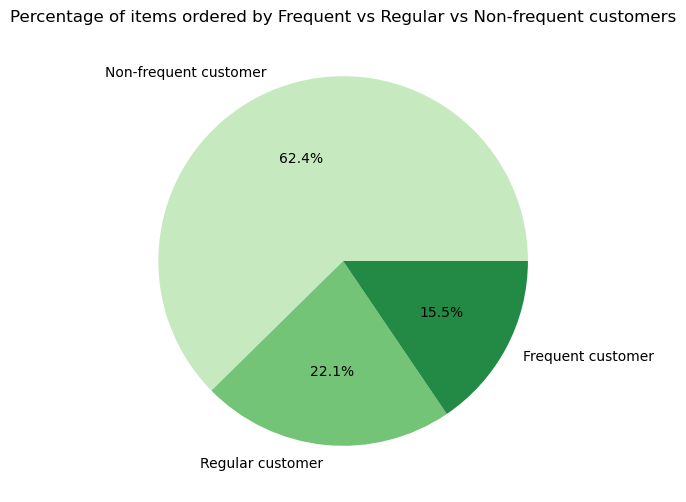

In [102]:
#Pie chart of percentage of items ordered by order_frequency_flag 
pie_orders_freq = df_reg_cust['order_frequency_flag'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = sns.color_palette('Greens', 3), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by Frequent vs Regular vs Non-frequent customers',fontsize=12)
plt.show()

In [104]:
# Export the orders_frequency pie chart
pie_orders_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_frequency.png'))

#07 Descriptive statistics on customer profiles for usage frequency and expenditure.

In [105]:
# Usage frequency and expenditure by Age groups
cross_age_orderhabits = df_reg_cust.groupby('age_group').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [106]:
# Usage frequency and expenditure by Income groups
cross_income_orderhabits = df_reg_cust.groupby('income_group').agg({'prices': ['mean', 'min', 'max'], 
                                                                    'days_since_prior_order': ['mean', 'min', 'max']})

In [107]:
# Usage frequency and expenditure by customers with dependants and without
cross_family_orderhabits = df_reg_cust.groupby('dependants').agg({'prices': ['mean', 'min', 'max'], 
                                                                  'days_since_prior_order': ['mean', 'min', 'max']})

In [108]:
# Usage frequency and expenditure by customers grouped by diet choice
cross_diet_orderhabits = df_reg_cust.groupby('diet_choice').agg({'prices': ['mean', 'min', 'max'], 
                                                                'days_since_prior_order': ['mean', 'min', 'max']})

#08 Customer profiles with regions and departments.

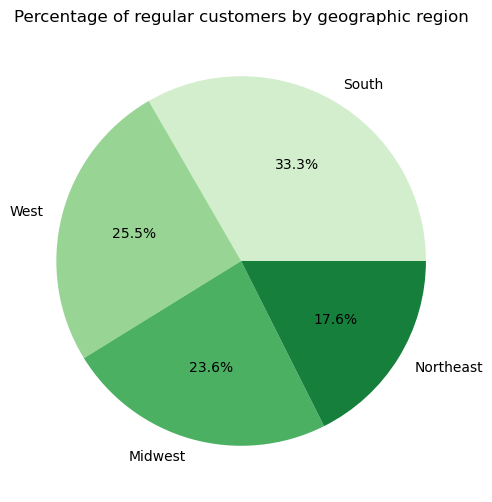

In [109]:
# Pie chart of percentage of regular customers in each region
pie_user_region = df_customer['region'].value_counts().plot.pie(figsize = (6,6), 
                                                                colors = sns.color_palette('Greens', 4), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of regular customers by geographic region',fontsize=12)
plt.show()

In [111]:
# Export the user_region pie chart
pie_user_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_user_region.png'))

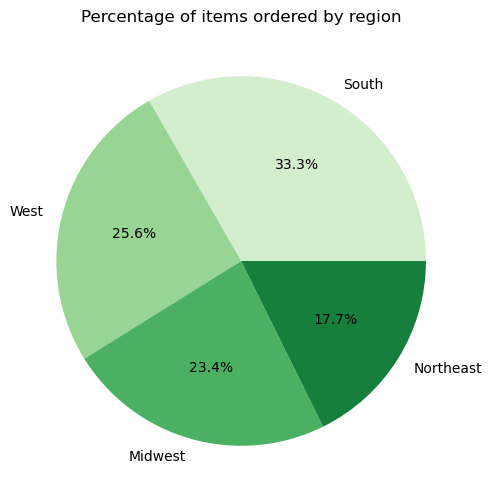

In [112]:
# Pie chart of percentage of items ordered by region
pie_orders_region = df_reg_cust['region'].value_counts().plot.pie(figsize = (6,6), 
                                                                         colors = sns.color_palette('Greens', 4), 
                                                                         autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of items ordered by region',fontsize=12)
plt.show()

In [113]:
# Export the orders_region pie chart
pie_orders_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','pie_orders_region.png'))

#09 Suitable charts to illustrate your results

In [115]:
# Do customers in different regions order at different rates?
#crosstab region and order_frequency flag - normalized
crosstab_regional_freq_n = pd.crosstab(index = df_customer['region'], 
                                        columns = df_customer['order_frequency_flag'], 
                                        normalize = 'index')

In [116]:
# Crosstab to put labels on chart
crosstab_regional_freq_2 = pd.crosstab(index = df_customer['region'], 
                                         columns = df_customer['order_frequency_flag'])

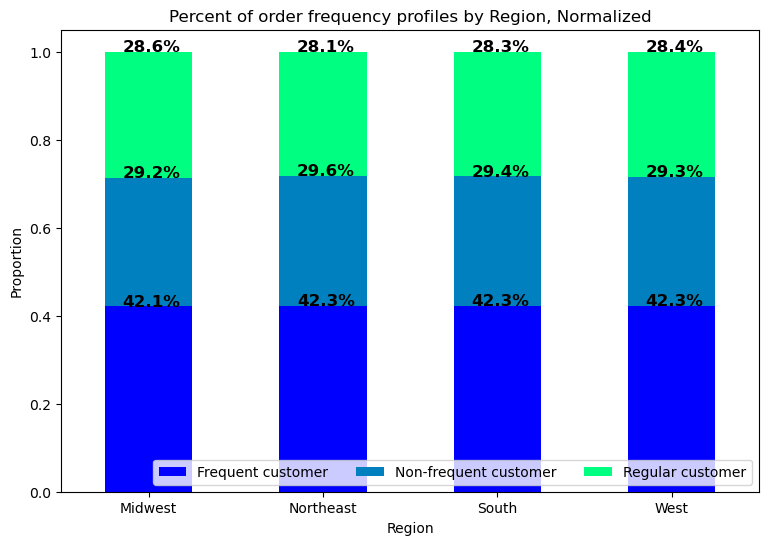

In [118]:
#Regional distribution of frequent customer profiles

bar_norm_region_freq = crosstab_regional_freq_n.plot( kind ='bar',
                                                       stacked = True,
                                                       colormap = 'winter',
                                                       figsize = (9, 6))
 
plt.title('Percent of order frequency profiles by Region, Normalized')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Region')
plt.xticks(rotation = 0)
plt.ylabel('Proportion')

for n, x in enumerate([*crosstab_regional_freq_2.index.values]):
    for (proportion, y_loc) in zip(crosstab_regional_freq_n.loc[x],
                                   crosstab_regional_freq_n.loc[x].cumsum()):
    
        plt.text(x= n -0.15,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 12,
                 fontweight = 'bold')

plt.show()

In [119]:
# Export the orders_region pie chart
bar_norm_region_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_norm_region_freq.png'))